## Which candy is King?

Halloween is the time of year where the candy industry is at its peak. But have you ever wondered which candy is the most popular on Halloween? In this analysis I aim to answer that question as well as identify any trends in the data. This study can help manufacturers get a better idea of what kind of candy their customers like during Halloween. Armed with this knowledge they can adjust their products accordingly to improve their sales.

This dataset is provided by David Ng's survey conducted on Halloween 2017(https://www.scq.ubc.ca/so-much-candy-data-seriously/). It asks basic identifyer questions(age,gender, etc) Then it asks how each surveyor feels about a certain candy.

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_excel('candyhierarchy2017.xlsx')

In [50]:
data.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


This dataset is extremely messy, cleaning is going to be a must before conducting any analysis.

# 1) Data Cleaning

## Dropping Columns

Some columns that were left blank in the Excel file made their way into the dataframe, we will drop those. In addition, we will also drop columns that are not relevant to candy statistics. For example: the column with answers to the dress question.

In [51]:
data.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [52]:
data = data.drop(['Unnamed: 113','Q10: DRESS'],axis = 1)

In [53]:
list = data.columns
list

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q6 | York Peppermint Patties', 'Q7: JOY OTHER', 'Q8: DESPAIR OTHER',
       'Q9: OTHER COMMENTS', 'Q11: DAY', 'Q12: MEDIA [Daily Dish]',
       'Q12: MEDIA [Science]', 'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]',
       'Click Coordinates (x, y)'],
      dtype='object', length=118)

We are not done dropping columns yet. I will now drop columns that have a good amount of data missing. I'll use the 80% rule of thumb as a bench mark 

In [54]:
data.shape

(2460, 118)

In [55]:
rows = data['Internal ID'].count()
thresh = 0.8 * rows
def filter(thresh,data):
    near_empty = []
    for col in data.columns:
        if(data[col].isnull().sum() >= thresh ):
            near_empty.append(col)
    return near_empty
to_drop = filter(thresh,data)
to_drop

['Q9: OTHER COMMENTS',
 'Q12: MEDIA [Daily Dish]',
 'Q12: MEDIA [ESPN]',
 'Q12: MEDIA [Yahoo]']

In [56]:
data = data.drop(to_drop,axis = 1)
data.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties',
       'Q7: JOY OTHER', 'Q8: DESPAIR OTHER', 'Q11: DAY',
       'Q12: MEDIA [Science]', 'Click Coordinates (x, y)'],
      dtype='object', length=114)

The next step would be to impute some missing values but we have to keep in mind that some of the data is not numeric. 
The most notible ones are the answers to the candy survey questions. Looking at the documentation for the data set we see that the possible answers are DESPAIR, MEH and JOY. There are also some other categorical questions. 


Text(0.5, 1.0, 'Missing Values')

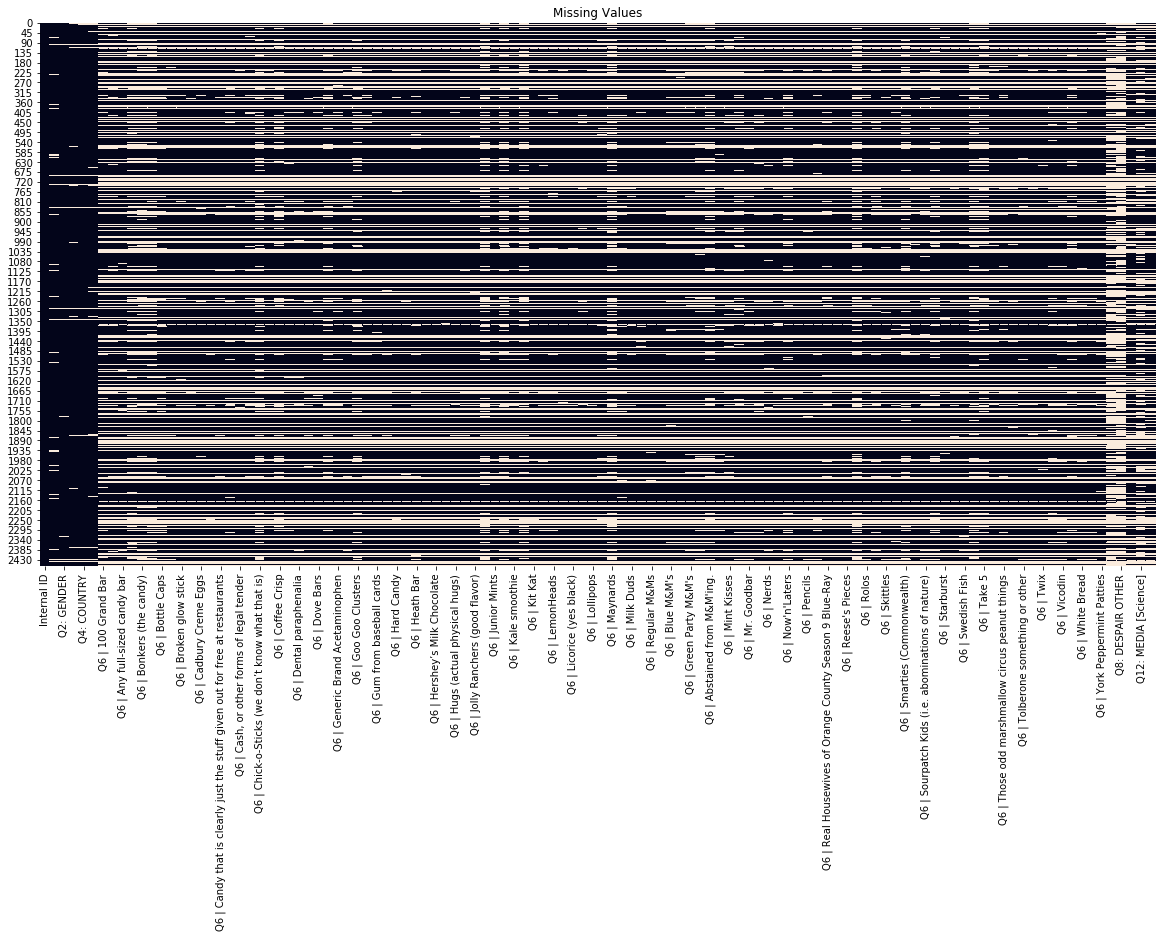

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.isnull(),cbar = False).set_title("Missing Values")

Because of the large volume of features in our data set, it is hard to visualize how much data is missing for a specific column. What is clear though is that there is alot of white in this chart, meaning there is alot of data missing. Let us take a closer look at this missing data. 

Text(0.5, 1.0, 'Number of Missing Values in Each Column')

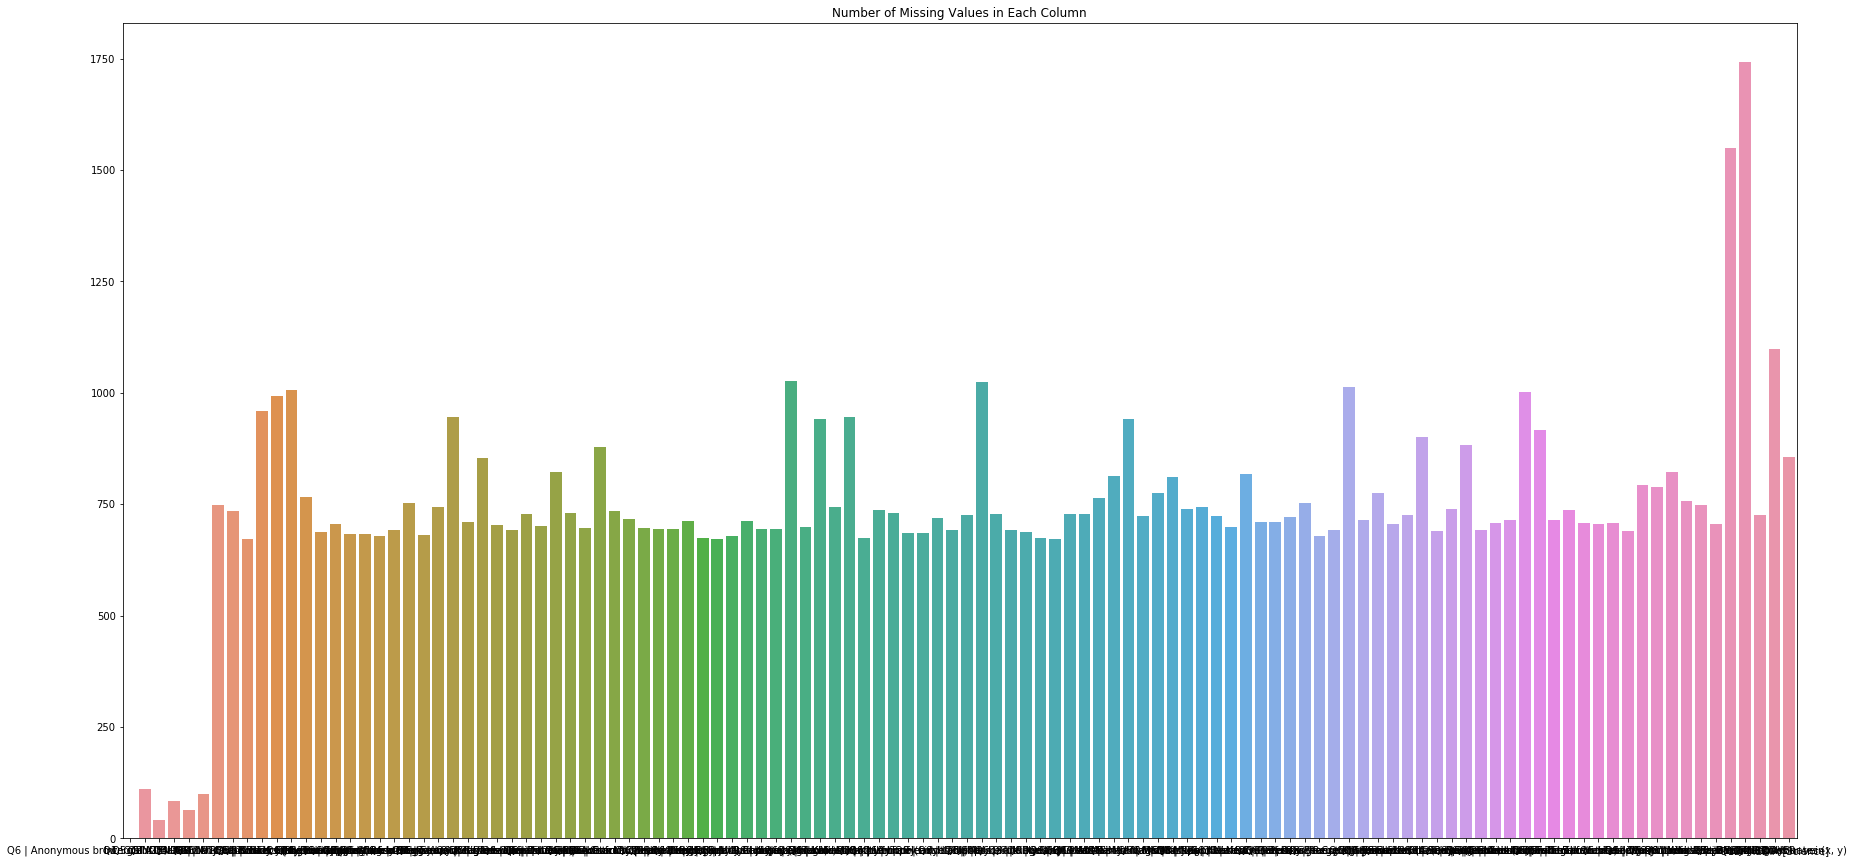

In [58]:
fig, ax = plt.subplots(figsize=(30,15))
sns.barplot(data.columns,data.isnull().sum()).set_title("Number of Missing Values in Each Column")

Looking at this graph we can see a spike in missing values towards the end of the survey. Referencing the previous heat map we can see that the largest spike comes from the column 'Q8: Despair Other'. As you can guess this column contains the answers of the question "what other candy do you despise?". Since the goal of this study is to figure out what consumers like this column can be dropped since it does not help solve the problem and it filled with alot of missing values.

The spike to the left of it is the column containing the question of "what other candy do you enjoy". This is relevant to the question at hand thus we will keep this column. In fact, I will leave this column alone and not conduct any type of imputation on it. The way I see it, the core statstics come from the main questions themselves. Since this is a supplemental question, the answers are supplemental statistics and thus serve only to enahnce an argument instead of make one. 

In [59]:
data = data.drop(['Q8: DESPAIR OTHER'], axis = 1)
data.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties',
       'Q7: JOY OTHER', 'Q11: DAY', 'Q12: MEDIA [Science]',
       'Click Coordinates (x, y)'],
      dtype='object', length=113)

## Handling Anomolies

Some of these questions allowed the user to type in their answer. This led to incorrect entries. For example, the Q3: AGE column has some string responses even though we only expected integers. Let's clean this up.

In [60]:
data.dtypes

Internal ID                                                                                 int64
Q1: GOING OUT?                                                                             object
Q2: GENDER                                                                                 object
Q3: AGE                                                                                    object
Q4: COUNTRY                                                                                object
Q5: STATE, PROVINCE, COUNTY, ETC                                                           object
Q6 | 100 Grand Bar                                                                         object
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     object
Q6 | Any full-sized candy bar                                                              object
Q6 | Black Jacks                                                                           object
Q6 | Bonkers (the ca

Almost all our columns are of type object. This is troublesome since object can encompass many things and does not gurantee that each column has its required type. 

For our age column to can use pandas' to_numeric function to filter out all the unnecessary strings. 

In [61]:
data['Q3: AGE'].isnull().sum()

84

In [62]:
data['Q3: AGE'] = pd.to_numeric(data['Q3: AGE'],errors='coerce')

In [63]:
data['Q3: AGE'].isnull().sum()

108

In [64]:
data['Q3: AGE'].dtype

dtype('float64')

Our age column is now numeric as it should be. All 24 strings were converted to NaN values. The age column is also a free form answer, thus we can expect some anomalies in this column even after elimimating non numeric answers. Let's see what we're dealing with.

Text(0.5, 1.0, 'Ages')

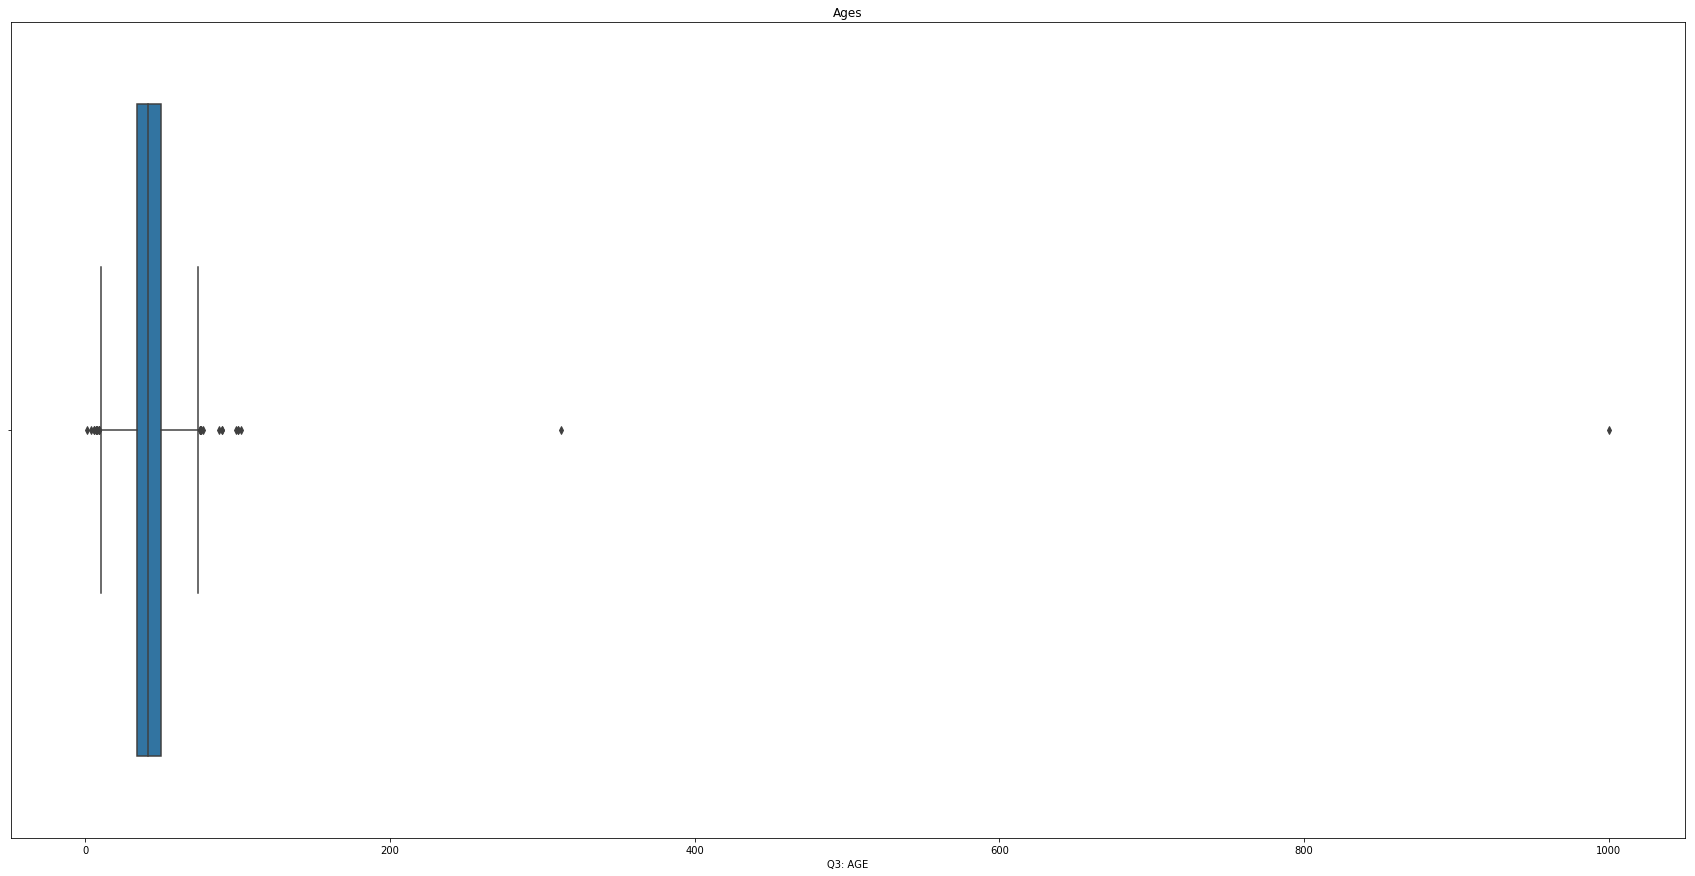

In [65]:
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x=data["Q3: AGE"]).set_title('Ages')

As you can see we got some insane ages reported. We got people ranging from 0 to 1000 years old! Right off the bat let's get rid of the 1000 as it will throw off our standard deviation.

Text(0.5, 1.0, 'Ages')

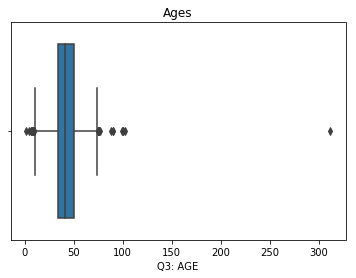

In [66]:
avg_age = data["Q3: AGE"].mean()
data['Q3: AGE'] = data['Q3: AGE'].replace(1000, avg_age)
sns.boxplot(x=data["Q3: AGE"]).set_title('Ages')

Now we can get rid of the rest of the outliers. 

Average Age: 42.61730442176871
Upper threshold: 82.71221920208315
Lower threshold: 2.522389641454268


Text(0.5, 1.0, 'Ages')

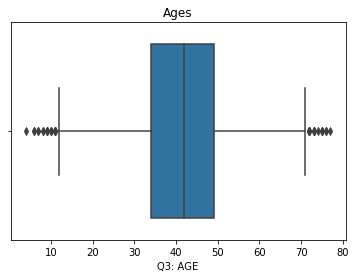

In [67]:
rows = len(data)
age_std = data["Q3: AGE"].std()
thresh = age_std * 3
up_lim = avg_age + thresh
print("Average Age:",avg_age)
print("Upper threshold:",up_lim)
lo_lim = avg_age - thresh
print("Lower threshold:",lo_lim)

data['Q3: AGE'] = data['Q3: AGE'].replace(np.nan,avg_age, regex=True)
outliers = []

for i in range(rows):
    if (data['Q3: AGE'][i] >= up_lim or data['Q3: AGE'][i] <= lo_lim):
         data['Q3: AGE'] = data['Q3: AGE'].replace(data['Q3: AGE'][i], avg_age)
  
sns.boxplot(x=data["Q3: AGE"]).set_title('Ages')

To a certain degree our age column looks more reasonible now. 

Next lets deal with the Q4: COUNTRY column.

We want this column to be of type string. We have to do a little more work for this column. First lets determine what type of objects are in this column. The function below accomplishes this.

In [68]:
def determine_types(col):
    types = set([])
    for index, row in data.iterrows():
        types.add(type(row[col]))
    return types

col4_types = determine_types('Q4: COUNTRY')
print(col4_types)       

{<class 'float'>, <class 'str'>, <class 'int'>}


Now we know we have to handle 3 types of data. Next I'll create a function to replace the unwanted types (floats and ints) to our desired type of string. I will use the string "Missing" to fill in the unwanted types. 

In [69]:
data['Q4: COUNTRY'] = data['Q4: COUNTRY'].replace(np.nan,'Missing', regex=True)

data['Q4: COUNTRY'] = data['Q4: COUNTRY'].astype(str)
print(determine_types('Q4: COUNTRY'))


for i in range(rows):
     if (data['Q4: COUNTRY'][i].isnumeric()):
        data['Q4: COUNTRY'][i] = 'Missing'

data['Q4: COUNTRY'] = data['Q4: COUNTRY'].apply(lambda x: x.strip())
data['Q4: COUNTRY'].unique()


{<class 'str'>}


C:\Users\Nick Kouthong\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array(['Missing', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United staes', 'United States of America', 'UAE',
       'England', 'UK', 'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA',
       'america', 'france', 'U.S.A.', 'finland', 'unhinged states',
       'united states of america', 'US of A', 'Unites States',
       'The United States', 'North Carolina', 'Unied States',
       'Netherlands', 'germany', 'Europe', 'Earth', 'U S', 'u.s.', 'U.K.',
       'Costa Rica', 'The United States of America', 'unite states',
       'U.S.', 'cascadia', 'Australia', 'insanity lately', 'Greece',
       'USA? Hard to tell anymore..', "'merica", 'usas', 'Pittsburgh',
       'United State', 'France', 'australia', 'A', 'Can', 'Canae',
       'New York', 'Trumpistan', 'Ireland', 'United Sates', 'Korea',
       'California', 'Japan', 'USa', 'South africa',
       'I pretend to be from Canada, but I am real

We got rid of all the numeric and NaN values in column 4.

In [70]:
data['Q5: STATE, PROVINCE, COUNTY, ETC'] = data['Q5: STATE, PROVINCE, COUNTY, ETC'].astype(str)
data['Q5: STATE, PROVINCE, COUNTY, ETC'] = data['Q5: STATE, PROVINCE, COUNTY, ETC'].apply(lambda x: x.strip())
data['Q5: STATE, PROVINCE, COUNTY, ETC'].unique()

array(['nan', 'NM', 'Virginia', 'or', 'exton pa', 'Colorado', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Los Angeles, California', 'CA', 'New York',
       'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota', 'London',
       'mn', 'TEXAS', 'Illinois', 'District of Columbia', 'Washington',
       'Massachusetts', 'OR', 'Montana', 'massachusetts', 'Abu Dhabi',
       'TX', 'Arizona', 'Dc', 'yukon', 'Pennsylvania', 'MD', 'Ohio',
       'OXFORDSHIRE', 'DC', 'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI',
       'alaska', 'Ny', 'Colorado, Jefferson county', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska', 'Oregon', 'UT', 'ny', 'CDMX',
       'north carolina', 'Tennessee', 'Knox county, Tennessee',
       'New Mexico', 'Maine', 'maine', 'Virginia, Arlington', 'WA', 'MO',
     

Columns 4 and 5 have been proccessed but the information is still a mess. We still need to cluster abreviations with their original meanings (EX: USA --> United States of America) as well as detect which entries are anomolies. I will be using natural language processing techniques to clean and extract information from these columns. The work on these two columns will continue in the exploratory data analysis section below.  

## What to do with the missing values?


Almost all the columns for the candy questions have no higher than 50% of their values missing. So what should we do in this case? Imputation? Use Machine learning? I actually propose that we leave them and here is why.

In the context of this problem, missing values are extremely useful in shedding some light on the current candy market. If we think about why a person would leave an answer to a question blank, the reason is likely because they are unfamiliar with the candy or the candy has no made a significant impact on them. This information can tell companies where to market their product next so that more people are familiar with it. Thus, I will treat missing values as any other value in this study.  

# 2) Exploratory Data Analysis

To kick off our EDA, lets first explore the demographic of our participants. 

Text(0.5, 1.0, 'Genders of Participants')

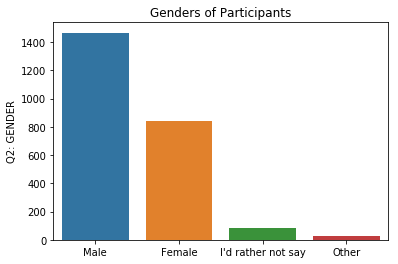

In [71]:
sns.barplot(x = data['Q2: GENDER'].value_counts().index,y = data['Q2: GENDER'].value_counts()).set_title("Genders of Participants")

Text(0.5, 1.0, 'Distribution of Ages of Participants')

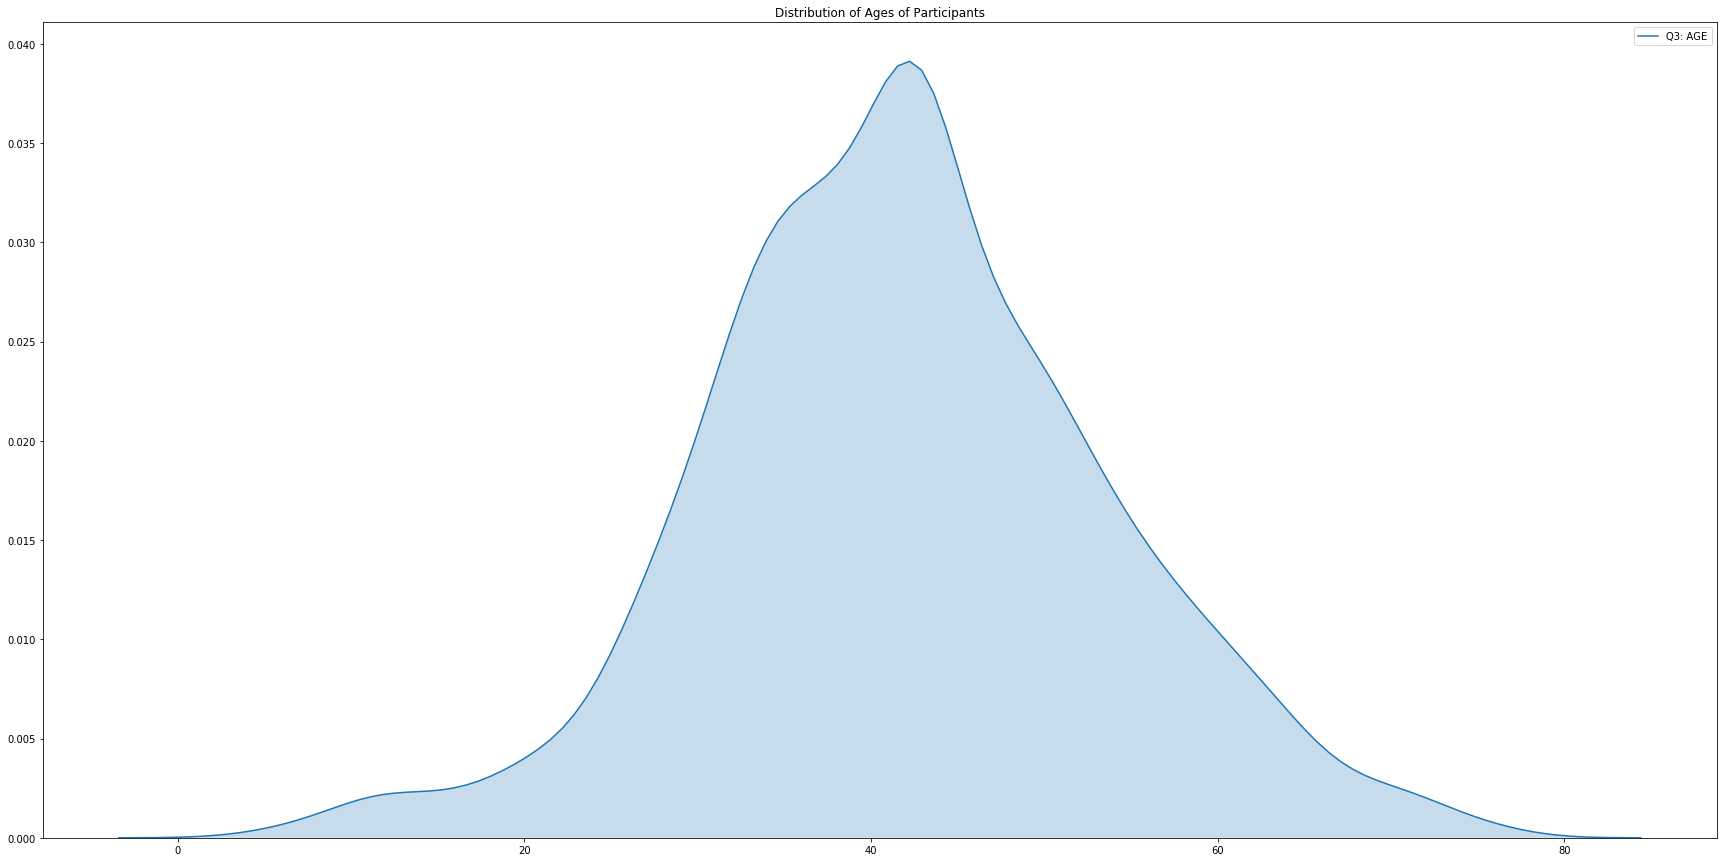

In [72]:
fig, ax = plt.subplots(figsize=(30,15))
sns.kdeplot(data['Q3: AGE'], shade = True).set_title("Distribution of Ages of Participants")

### Some takeaways from these two plots: 
####  1)Most of the particpants are male 
####  2)The average participant is in their 40's  


The next step would be to analyze locations the survey participants are coming from; however, our previous cleaning of the column only eliminated numerical anamolies. There are plenty of non numeric anamolies that are present. It would be extremely difficult and time consuming to filter these out by hand. Thankfully we can use machine learning to help clean up the mess.

## Natural language processing

We can use NLP to help cluster our data and hopefully isolate the anamolies. I will be using the genism and nltk libraries to carry out NLP.

In [73]:
from gensim import models
import nltk

In [74]:
data.head(10)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q11: DAY,Q12: MEDIA [Science],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,42.617304,Missing,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44.000000,USA,NM,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,Sunday,1.0,"(84, 25)"
2,90272829,NaN,Male,49.000000,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40.000000,us,or,MEH,DESPAIR,JOY,MEH,...,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",Sunday,1.0,"(75, 23)"
4,90272841,No,Male,23.000000,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,Friday,1.0,"(70, 10)"
5,90272852,No,Male,42.617304,Missing,nan,JOY,DESPAIR,JOY,NaN,...,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,1.0,"(75, 23)"
6,90272853,No,Male,53.000000,usa,Colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,90272854,No,Male,33.000000,canada,ontario,JOY,DESPAIR,JOY,DESPAIR,...,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,using my elbows to get in front of the little ...,Friday,1.0,"(55, 5)"
8,90272858,No,Male,40.000000,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,NaN,Sunday,1.0,"(76, 24)"
9,90272859,No,Female,53.000000,Us,Wa,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,Peanut butter m&ms,Sunday,1.0,"(70, 28)"


In [75]:
data['Q4: COUNTRY'] =  data['Q4: COUNTRY'].str.lower()
data['Q4: COUNTRY'].unique()

array(['missing', 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new je

As we can see, there are some unusual responses to the country question. Let's take a look at how this could effect our analysis. I will be using NLTK's frequency distribuition to plot the most common responses.

[nltk_data] Downloading package stopwords to C:\Users\Nick
[nltk_data]     Kouthong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


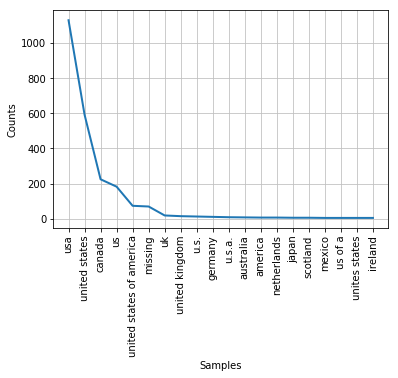

In [76]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
freq = nltk.FreqDist(data['Q4: COUNTRY'])
mod_counter = 0
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

'''
for i in range(rows):
    if (data['Q4: COUNTRY'][i] != 'missing') and (data['Q4: COUNTRY'][i] not in stopwords):
        all_words = all_words +  data['Q4: COUNTRY'][i] + " "
all_words
'''
freq.plot(20, cumulative=False)


We already see some glaring problems. Multiple entries represent the same country( EX: USA = United States) plus there seems to be signs of typos (unites states). It would be wise to clean this column up further before scouting for conclusive results.

In [77]:
nltk.download('averaged_perceptron_tagger')

# test string
s = 'ahem....amerca'
translator=str.maketrans('','',string.punctuation)
s = s.translate(translator)
print(s)

ahemamerca


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nick Kouthong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


We now got a translator to remove punctuation from the entries. Now we can cluster abreviated entries. 

In [78]:
countries = data['Q4: COUNTRY']

for i in range(len(countries)):
    countries = countries.replace(countries[i],countries[i].translate(translator))
countries.unique()


array(['missing', 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'usausausa', 'america', 'france',
       'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'costa rica',
       'the united states of america', 'unite states', 'cascadia',
       'australia', 'insanity lately', 'greece',
       'usa hard to tell anymore', 'merica', 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada but i am really from the united states',
       'iceland', 'scotland', 'denmark', 'united stated', 'switzerland',
       'ahemamerca', 'ud', 'south korea', 'new jersey', 'indonesia',
       'united ststes', 'th

We were able to eliminate punctuations from the entries. Now lets figure out how to cluster the typos and abreviations for the same country

In [79]:
data['Q4: COUNTRY'] = countries
data['Q4: COUNTRY'].unique()

array(['missing', 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'usausausa', 'america', 'france',
       'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'costa rica',
       'the united states of america', 'unite states', 'cascadia',
       'australia', 'insanity lately', 'greece',
       'usa hard to tell anymore', 'merica', 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada but i am really from the united states',
       'iceland', 'scotland', 'denmark', 'united stated', 'switzerland',
       'ahemamerca', 'ud', 'south korea', 'new jersey', 'indonesia',
       'united ststes', 'th

We can use the fuzzywuzzy library which uses the Leveshtein distance to score the similarities between words. It won't be a magical solution but it will help reduce the amount of duplicates from typos and abbreviations.

In [88]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

#This is a reflective process. Use a list to keep track of seen entries to prevent 
#reflecivity.
changed = []

#Note: try to find ways to optimize runtime
for i in range(len(countries) - 1):
    curr = countries[i]
    for j in range(i+1,len(countries)):
        if((fuzz.ratio(curr, countries[j]) >= 70) and (j not in changed)):
            countries = countries.replace(countries[i],countries[j])
            changed.append(j)
            

In [89]:
countries.unique()

array(['missing', 'u s', 'can', 'murrika', 'united statea', 'uk',
       'united kingdom', 'uae', 'endland', 'mexico', 'usa usa usa',
       'france', 'us of a', 'north carolina', 'the netherlands',
       'germany', 'europe', 'earth', 'costa rica',
       'the united states of america', 'australia', 'insanity lately',
       'greece', 'usa hard to tell anymore', 'pittsburgh', 'a',
       'new york', 'trumpistan', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada but i am really from the united states',
       'scotland', 'denmark', 'switzerland', 'ahemamerca', 'ud',
       'south korea', 'new jersey', 'indonesia', 'atlantis', 'alaska',
       'soviet canuckistan', 'n america', 'singapore', 'china', 'taiwan',
       'hong kong', 'spain', 'sweden', 'narnia',
       'subscribe to dm4uz3 on youtube', 'i dont know anymore',
       'fear and loathing'], dtype=object)

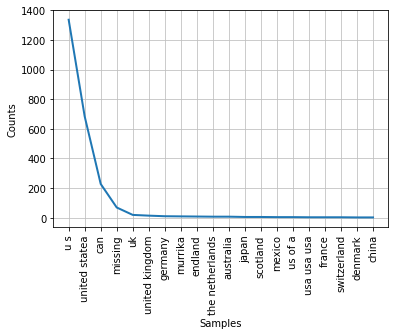

In [92]:
data['Q4: COUNTRY'] = countries
freq = nltk.FreqDist(data['Q4: COUNTRY'])
freq.plot(20, cumulative=False)

There are still duplicates but at least now we got a better view of the various countries reported from.
### Observations:
#### 1) The United States contains the most entries, followed by Canada
#### 2) The United Kingdom has the most entries out of all European countries reported.

## Candy Time
It is now time to look at all the candies. First let's extract all the columns that contain the responses for various candies. This is simple as all the candy column names follow the format of 'Q6 | candy name'.

In [96]:
cols = data.columns
candy_cols = []
for i in range(len(cols)):
    if 'Q6' in cols[i]:
        candy_cols.append(cols[i])
        
candy_cols

['Q6 | 100 Grand Bar',
 'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Q6 | Any full-sized candy bar',
 'Q6 | Black Jacks',
 'Q6 | Bonkers (the candy)',
 'Q6 | Bonkers (the board game)',
 'Q6 | Bottle Caps',
 "Q6 | Box'o'Raisins",
 'Q6 | Broken glow stick',
 'Q6 | Butterfinger',
 'Q6 | Cadbury Creme Eggs',
 'Q6 | Candy Corn',
 'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
 'Q6 | Caramellos',
 'Q6 | Cash, or other forms of legal tender',
 'Q6 | Chardonnay',
 'Q6 | Chick-o-Sticks (we don’t know what that is)',
 'Q6 | Chiclets',
 'Q6 | Coffee Crisp',
 'Q6 | Creepy Religious comics/Chick Tracts',
 'Q6 | Dental paraphenalia',
 'Q6 | Dots',
 'Q6 | Dove Bars',
 'Q6 | Fuzzy Peaches',
 'Q6 | Generic Brand Acetaminophen',
 'Q6 | Glow sticks',
 'Q6 | Goo Goo Clusters',
 "Q6 | Good N' Plenty",
 'Q6 | Gum from baseball cards',
 'Q6 | Gummy Bears straight up',
 'Q6 | Hard Candy',
 'Q6 | Healthy Fruit',
 'Q6 | Heath Bar',
 

Now we will be counting the amount of 'JOY' answers for each candy to give us a measure of what are the most loved candies

In [109]:
import math
candy_dict = {}
for i in range(len(candy_cols)):
    curr = data[candy_cols[i]]
    #check for nan values
    nul_list = pd.isnull(curr)
    #extract candy name
    name = candy_cols[i].replace('Q6 | ','')
    #counter for 'JOY responses'
    count = 0
    for j in range(len(curr)):
        if((not nul_list[j]) and curr[j] == 'JOY'):
            count = count + 1
    candy_dict[name] = count

In [110]:
candy_dict

{'100 Grand Bar': 873,
 'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)': 176,
 'Any full-sized candy bar': 1559,
 'Black Jacks': 92,
 'Bonkers (the candy)': 116,
 'Bonkers (the board game)': 193,
 'Bottle Caps': 465,
 "Box'o'Raisins": 117,
 'Broken glow stick': 24,
 'Butterfinger': 1177,
 'Cadbury Creme Eggs': 820,
 'Candy Corn': 478,
 'Candy that is clearly just the stuff given out for free at restaurants': 39,
 'Caramellos': 953,
 'Cash, or other forms of legal tender': 1439,
 'Chardonnay': 1040,
 'Chick-o-Sticks (we don’t know what that is)': 299,
 'Chiclets': 244,
 'Coffee Crisp': 474,
 'Creepy Religious comics/Chick Tracts': 246,
 'Dental paraphenalia': 91,
 'Dots': 410,
 'Dove Bars': 1176,
 'Fuzzy Peaches': 402,
 'Generic Brand Acetaminophen': 162,
 'Glow sticks': 612,
 'Goo Goo Clusters': 409,
 "Good N' Plenty": 408,
 'Gum from baseball cards': 44,
 'Gummy Bears straight up': 748,
 'Hard Candy': 272,
 'Healthy Fruit': 228,
 'Heath Bar': 1069,


In [116]:
keys = np.asarray(candy_dict.keys())
values = np.asarray(candy_dict.values())
sns.barplot(x = keys, y = values)

TypeError: float() argument must be a string or a number, not 'dict_values'